# Activation Functions — Assignment  
**Submitter Name:** Aasif Majeed  
**Date:** 23 Oct 2024  

This notebook answers the questions from the provided PDF and includes:
- Each question written with its number  
- Detailed explanations with examples  
- A small experiment comparing **ReLU vs Sigmoid vs Tanh** in a simple neural network  

Source: *Activation functions — Assignment Questions* (uploaded PDF).  


> Questions extracted from the uploaded PDF (page 2).

## Q1) Explain the role of activation functions in neural networks. Compare and contrast linear and nonlinear activation functions. Why are nonlinear activation functions preferred in hidden layers?


### Role of activation functions
In a neural network, each neuron computes:

\[
z = w^T x + b
\]

Then applies an **activation function** \(a = \phi(z)\).

Activation functions matter because they:
1. **Introduce non-linearity** so the network can model complex patterns (curves, boundaries, interactions).
2. **Control signal range** (e.g., Sigmoid outputs \(0\to1\); Tanh outputs \(-1\to1\)).
3. **Shape gradients** during backpropagation (affects training stability and speed).
4. Help with **interpretable outputs** (probabilities via Sigmoid/Softmax).

---

### Linear vs Nonlinear activations

#### Linear activation
A linear activation is:
\[
\phi(z)=z
\]
If every layer is linear, the full network collapses to a **single linear transformation**:

\[
W_2(W_1x+b_1)+b_2 = Wx + b
\]

So a deep linear network is **no more powerful than linear regression**.

**Where used:** commonly in the **output layer for regression** (predicting any real value).

#### Nonlinear activation
Examples: ReLU, Sigmoid, Tanh, Leaky ReLU, GELU, etc.

Nonlinearity allows networks to approximate complex functions (universal approximation idea).

---

### Why nonlinear activations are preferred in hidden layers
Hidden layers are where the network learns **useful internal representations**. Without nonlinearity:
- The model cannot learn nonlinear decision boundaries.
- Problems like **XOR** cannot be solved.

**Bottom line:** Nonlinear activations make deep learning *deep*—otherwise depth gives no benefit.


## Q2) Describe the Sigmoid activation function. What are its characteristics, and in what type of layers is it commonly used? Explain the Rectified Linear Unit (ReLU) activation function. Discuss its advantages and potential challenges. What is the purpose of the Tanh activation function? How does it differ from the Sigmoid activation function?


### (A) Sigmoid activation
\[
\sigma(z)=\frac{1}{1+e^{-z}}
\]
**Range:** \( (0, 1) \)  

**Characteristics**
- Smooth, differentiable.
- Converts values into a probability-like range.
- Saturates for large positive/negative \(z\) → gradient becomes very small.

**Common use**
- **Output layer** for **binary classification** (predicting \(P(y=1|x)\)).

**Main issue: Vanishing gradients**
For large \(|z|\), \(\sigma(z)\) is near 0 or 1, and derivative is near 0 → learning slows.

---

### (B) ReLU activation
\[
\text{ReLU}(z) = \max(0, z)
\]
**Range:** \([0, \infty)\)

**Advantages**
- Simple and fast.
- Helps reduce vanishing gradient compared to sigmoid/tanh (for \(z>0\), gradient = 1).
- Encourages sparse activations (many zeros).

**Challenges**
- **Dying ReLU**: if neurons get stuck with \(z<0\), gradient = 0 → neuron stops learning.
- Unbounded output can cause large activations if training is unstable.

---

### (C) Tanh activation
\[
\tanh(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
\]
**Range:** \((-1, 1)\)

**Purpose**
- Similar to sigmoid but **zero-centered**, which often helps optimization.

**Difference from sigmoid**
- Sigmoid: \((0,1)\), not zero-centered.
- Tanh: \((-1,1)\), zero-centered.
- Both can saturate (vanishing gradients), but tanh often behaves better in hidden layers than sigmoid.


## Q3) Discuss the significance of activation functions in the hidden layers of a neural network.


Hidden layers learn **features** (representations). Activation functions are significant because they determine:

1. **Expressive power**
   - Nonlinear activations let hidden layers model complex interactions.

2. **Training dynamics**
   - They affect gradients during backprop (vanishing vs healthy gradients).

3. **Sparsity and regularization**
   - ReLU produces many zeros → sparse features and sometimes better generalization.

4. **Stability of learning**
   - Bounded vs unbounded activations affect exploding/vanishing behaviors.

In short: *hidden-layer activations strongly influence what the network can learn and how efficiently it learns it*.


## Q4) Explain the choice of activation functions for different types of problems (e.g., classification, regression) in the output layer.


Choose output activation based on the prediction type:

### Regression (real-valued output)
- Activation: **Linear** (identity)
- Loss: MSE/MAE

### Binary classification
- Activation: **Sigmoid**
- Loss: Binary cross-entropy

### Multi-class classification (single label among K)
- Activation: **Softmax**
- Loss: Categorical cross-entropy

### Multi-label classification (multiple labels can be true)
- Activation: **Sigmoid per class**
- Loss: Binary cross-entropy per label

This ensures outputs match the interpretation (e.g., probabilities sum to 1 for softmax).


## Q5) Experiment with different activation functions (e.g., ReLU, Sigmoid, Tanh) in a simple neural network architecture. Compare their effects on convergence and performance.


We run a controlled experiment using **scikit-learn's MLPClassifier**:

- Dataset: **two moons** (nonlinear)
- Same preprocessing and architecture
- Change only activation:
  - `relu`
  - `tanh`
  - `logistic` (sigmoid)

Compare:
- Test accuracy
- Training loss curves (convergence)


---
# Code Section (Experiments & Visualizations)
---
## 0) Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# If you run this locally and sklearn is missing:
# pip install scikit-learn


## 1) Visualize activation functions and their derivatives

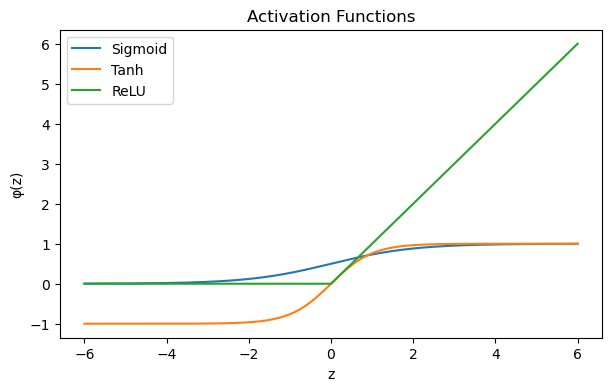

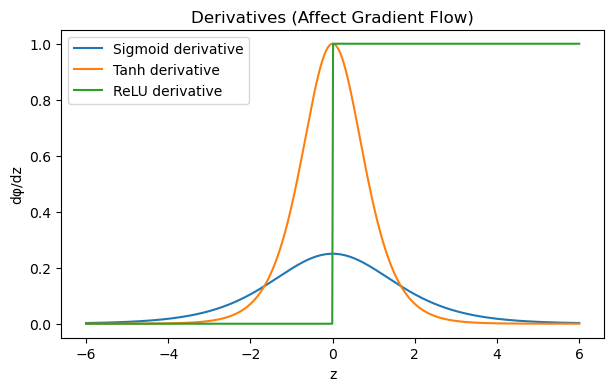

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

def dsigmoid(z):
    s = sigmoid(z)
    return s*(1-s)

def tanh(z):
    return np.tanh(z)

def dtanh(z):
    return 1 - np.tanh(z)**2

def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

z = np.linspace(-6, 6, 600)

plt.figure(figsize=(7,4))
plt.plot(z, sigmoid(z), label="Sigmoid")
plt.plot(z, tanh(z), label="Tanh")
plt.plot(z, relu(z), label="ReLU")
plt.title("Activation Functions")
plt.xlabel("z")
plt.ylabel("φ(z)")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(z, dsigmoid(z), label="Sigmoid derivative")
plt.plot(z, dtanh(z), label="Tanh derivative")
plt.plot(z, drelu(z), label="ReLU derivative")
plt.title("Derivatives (Affect Gradient Flow)")
plt.xlabel("z")
plt.ylabel("dφ/dz")
plt.legend()
plt.show()


## 2) Extra demo: Linear vs nonlinear (XOR)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0])

# Linear model (logistic regression) fails
lin = LogisticRegression().fit(X, y)
pred_lin = lin.predict(X)

# MLP with nonlinearity succeeds
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation="tanh", solver="lbfgs",
                    random_state=42, max_iter=2000)
mlp.fit(X, y)
pred_mlp = mlp.predict(X)

print("Logistic Regression (linear) accuracy on XOR:", accuracy_score(y, pred_lin))
print("MLP (nonlinear) accuracy on XOR:", accuracy_score(y, pred_mlp))
print("Linear predictions:", pred_lin)
print("MLP predictions   :", pred_mlp)


Logistic Regression (linear) accuracy on XOR: 0.5
MLP (nonlinear) accuracy on XOR: 1.0
Linear predictions: [0 0 0 0]
MLP predictions   : [0 1 1 0]


## 3) Main experiment: ReLU vs Tanh vs Sigmoid (logistic)

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Nonlinear dataset
X, y = make_moons(n_samples=2000, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

activations = ["relu", "tanh", "logistic"]  # logistic == sigmoid in sklearn
results = {}

for act in activations:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=(32, 16),
            activation=act,
            solver="adam",
            learning_rate_init=0.01,
            max_iter=300,
            random_state=42,
            early_stopping=True,
            n_iter_no_change=15,
            validation_fraction=0.15
        ))
    ])
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    mlp = model.named_steps["mlp"]
    results[act] = {
        "accuracy": acc,
        "loss_curve": mlp.loss_curve_,
        "iterations": mlp.n_iter_
    }

    print(f"Activation: {act}")
    print(f"  Test accuracy: {acc:.4f}")
    print(f"  Iterations run: {mlp.n_iter_}")
    print("  Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("  Classification report:\n", classification_report(y_test, y_pred))
    print("-"*60)

# Summary table
summary = pd.DataFrame({
    "activation": list(results.keys()),
    "test_accuracy": [results[a]["accuracy"] for a in results],
    "iterations": [results[a]["iterations"] for a in results]
}).sort_values("test_accuracy", ascending=False)

summary


Activation: relu
  Test accuracy: 0.9340
  Iterations run: 44
  Confusion matrix:
 [[232  18]
 [ 15 235]]
  Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       250
           1       0.93      0.94      0.93       250

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

------------------------------------------------------------
Activation: tanh
  Test accuracy: 0.9360
  Iterations run: 34
  Confusion matrix:
 [[235  15]
 [ 17 233]]
  Classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       250
           1       0.94      0.93      0.94       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

---------------------

,activation,test_accuracy,iterations
1,tanh,0.936,34
0,relu,0.934,44
2,logistic,0.880,28


## 4) Convergence comparison (loss curves)

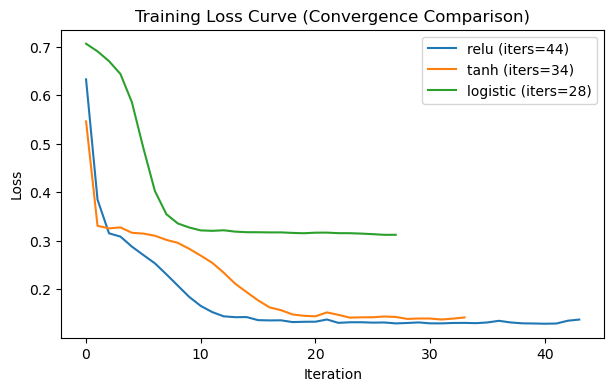

In [5]:
plt.figure(figsize=(7,4))
for act, info in results.items():
    plt.plot(info["loss_curve"], label=f"{act} (iters={info['iterations']})")
plt.title("Training Loss Curve (Convergence Comparison)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()


## 5) Discussion (Expected observations)
- **ReLU** often converges faster and reaches strong accuracy because its gradient is not tiny for positive inputs.
- **Tanh** may perform well but can saturate for large |z|, slowing learning compared to ReLU.
- **Sigmoid (logistic)** often converges slower and may underperform in deeper nets due to stronger saturation and vanishing gradients.

Your exact numbers can vary slightly due to randomness and optimizer behavior, but the *trend* is usually similar.
